---

## [미니프로젝트] 서울시 공유자전거 '따릉이'의 수요 예측

### 여러분은 서울시 정책 연구원으로써 서울시 공유자전거인 '따릉이'의 수요와 날씨간 연관성을 분석하라는 미션을 부여받았습니다.

#### <font color="blue"> 데이터 분석의 주 목적은 가치있는 정보를 찾아내는것!! </font>

### ▣ 우리가 풀어야 하는 문제는 무엇인가요?

 - 기상상황이 따릉이 수요에 주는 영향을 분석해봅시다.

---

## ▣ 데이터 소개
[기본 데이터]
* 학습데이터 : traindata.csv

## ▣ 데이터셋의 변수 소개
* date : 날짜
* hour : 시간
* temperature : 온도
* precipitation : 강우 여부, 비가 오지 않았으면 0, 비가 오면 1
* windspeed : 풍속(평균)
* humidity : 습도
* visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
* ozone : 오존 수치
* PM10 : 미세먼지 수치(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
* PM2.5 : 초미세먼지 수치(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
* count : 시간에 따른 따릉이 대여 수

---

### [과제1] 환경 설정
#### <span style="color: green"> 1) 라이브러리 불러오기 </span>

In [1]:
#EDA에 사용할 라이브러리를 import 하세요
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst

In [24]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from matplotlib import rcParams

#### <span style="color: green"> 2) 활용할 데이터 불러오기 </span>

In [3]:
#이번 프로젝트에서 분석할 데이터를 불러오세요
data = pd.read_csv('traindata.csv')

In [25]:
rcParams['figure.figsize'] = 10,4

### [과제2] 가설설정
#### '가설' 이란 단어를 생각해보면, 우리가 직접 가설을 만들어야 할것 같지만 통계에서 분석기법별 귀무가설/대립가설은 정해져있습니다.
- 귀무가설은 차이가 없다, 연관성이 없다, 효과가 없다.
- 대립가설은 차이가 있다, 연관성이 있다, 효과가 있다. 라고 간단하게 이해하시면 좋습니다.

#### 간단한 예로, 온도와 따릉이 대여량간 가설을 수립 해본다면

    - 귀무가설 : 온도와 따릉이 간에는 연관성이 없다.
    - 대립가설 : 온도와 따릉이 간에는 연관성이 있다.

로 가설이 자연스레 수립 됩니다.



---


#### <span style="color: green"> 'precipitation' 변수를 포함하여, 최소 5개 이상의 var와 따릉이 대여량 간 가설을 수립해주세요. </span>

##### Guide : Target은 따릉이 대여량 입니다.

- 가설 1 : 1시간전 강우 여부와 따릉이간에는 연관성이 없다.
    
    ㅇ 대립가설 : 1시간전 강우 여부와 따릉이 대여량 간에는 연관성이 있다.


- 가설 2 : 1시간 전 온도와 따릉이 간에는 연관성이 없다.

    ㅇ 대립가설 : 1시간 전 온도와 따릉이 대여량 간에는 연관성이 있다.


- 가설 3 : 풍속과 따릉이 간에는 연관성이 없다.

    ㅇ 대립가설 : 풍속과 따릉이 대여량 간에는 연관성이 있다.


- 가설 4 : 1시간 전 미세먼지 수치와 따릉이 간에는 연관성이 없다.

    ㅇ 대립가설 : 1시간 전 미세먼지 수치와 따릉이 대여량 간에는 연관성이 있다.


- 가설 5 : 시간대와 따릉이 간에는 연관성이 없다.

    ㅇ 대립가설 : 시간대와 따릉이 대여량 간에는 연관성이 있다.


- 가설 6 : 주말/평일 여부와 따릉이 간에는 연관성이 없다.

    ㅇ 대립가설 : 주말/평일 여부와 따릉이 대여량 간에는 연관성이 있다.

### [과제3] 단변량 분석

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

In [6]:
data.head()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30


In [5]:
data.tail()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
5822,2021-11-29,20,74.0,58.0,0.002,9.3,0,0.3,66,1193,273
5823,2021-11-29,21,65.0,56.0,0.002,8.4,0,2.0,70,1233,228
5824,2021-11-29,22,51.0,41.0,0.002,8.6,0,1.9,70,1250,215
5825,2021-11-29,23,43.0,35.0,0.001,8.2,0,2.1,71,1262,125
5826,2021-11-30,0,39.0,31.0,0.004,7.9,0,2.3,71,1483,95


### var1 : hour

In [8]:
var = 'hour'

1. 변수가 내포하고 있는 의미

- 변수의 의미를 한번 짚고 넘어갑시다.
hour 변수는 어떤 의미를 가지고 있나요?
    - 해당 날짜의 시간대(0~23)

2. 변수가 수치형인지 범주형인지


In [9]:
#변수의 자료형을 확인해보세요.
data[var].dtype

dtype('int64')

- 수치형(정수)

3. 변수의 결측치 존재 여부 및 조치방안

In [10]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data[var].isna().sum()

0

- 결측치 없음

4. 변수의 기초 통계량 확인

In [11]:
#변수의 기초 통계량을 확인해보세요
data[var].describe()

count    5827.000000
mean       11.506607
std         6.921963
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        23.000000
Name: hour, dtype: float64

5. 변수의 분포 확인

[]

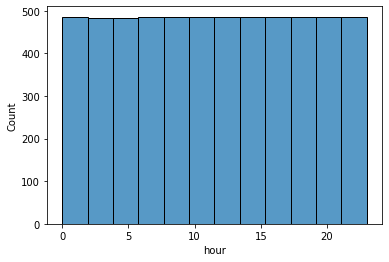

In [18]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.
sns.histplot(data=data, x=var, bins=12)
plt.plot()

- 모든 시간대에 대해 균일하게 데이터가 존재

6. 위 정보로 부터 파악한 내용 정리

- 위 정보로부터 파악하신 내용을 정리해보세요.
    - 각 시간대에 대해 정보가 균일하게 있으며, 결측치가 존재하지 않음.

7. 추가 분석사항 도출

### var2 : temperature

In [55]:
var = 'temperature'

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

- 날짜 및 시간대에 대한 온도

2. 변수가 수치형인지 범주형인지


In [21]:
#변수의 자료형을 확인해보세요.
data[var].dtype

dtype('float64')

- 수치형(유리수)

3. 변수의 결측치 존재 여부 및 조치방안

In [22]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data[var].isna().sum()

0

- 결측치 없음

4. 변수의 기초 통계량 확인

In [56]:
#변수의 기초 통계량을 확인해보세요
data[var].describe()

count    5827.000000
mean       19.376798
std         7.501572
min        -3.500000
25%        14.100000
50%        20.400000
75%        24.900000
max        36.300000
Name: temperature, dtype: float64

- 최소 -3도 ~ 최대 36도

5. 변수의 분포 확인

<AxesSubplot:xlabel='temperature'>

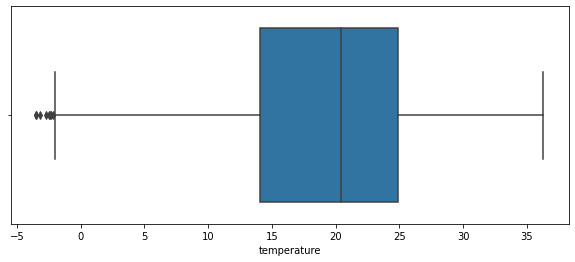

In [26]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.
sns.boxplot(x=data[var])

[]

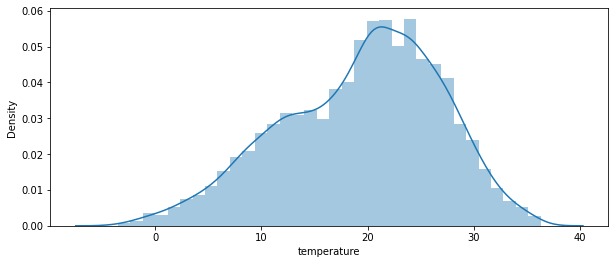

In [28]:
sns.distplot(data[var])
plt.plot()

6. 위 정보로 부터 파악한 내용 정리

7. 추가 분석사항 도출

### var3 : precipitation

In [29]:
var = 'precipitation'

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

- 해당 일자 및 시간대에 비가 오는지 안오는지 여부

2. 변수가 수치형인지 범주형인지


In [30]:
#변수의 자료형을 확인해보세요.
data[var].dtype

dtype('int64')

- 0, 1로 이루어진 범주형 데이터

3. 변수의 결측치 존재 여부 및 조치방안

In [31]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data[var].isna().sum()

0

- 결측치 없음

4. 변수의 기초 통계량 확인

In [32]:
#변수의 기초 통계량을 확인해보세요
data[var].describe()

count    5827.000000
mean        0.075511
std         0.264236
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: precipitation, dtype: float64

5. 변수의 분포 확인

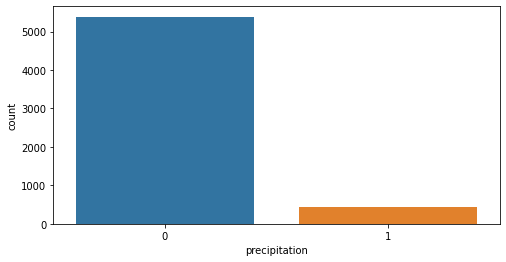

In [35]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.
rcParams['figure.figsize'] = 8,4
sns.countplot(data[var])
plt.show()

6. 위 정보로 부터 파악한 내용 정리

- 비가 오는 날에 비해 비가 오지 않은 날이 더 많음

7. 추가 분석사항 도출

- 눈이 오는 것도 강수 여부에 들어가는지?

### var4 : windspeed

In [36]:
var = 'windspeed'

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

- 일자 및 시간대에 따른 풍속(m/s)

2. 변수가 수치형인지 범주형인지


In [37]:
#변수의 자료형을 확인해보세요.
data[var].dtype

dtype('float64')

- 수치형(유리수)

3. 변수의 결측치 존재 여부 및 조치방안

In [38]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data[var].isna().sum()

0

- 결측치 없음

4. 변수의 기초 통계량 확인

In [39]:
#변수의 기초 통계량을 확인해보세요
data[var].describe()

count    5827.000000
mean        2.237601
std         1.054516
min         0.000000
25%         1.500000
50%         2.200000
75%         2.800000
max         8.300000
Name: windspeed, dtype: float64

- 일반적으로 0~3 사이에 값이 존재하나 최대값(8)과 같은 이상치 존재

5. 변수의 분포 확인

[]

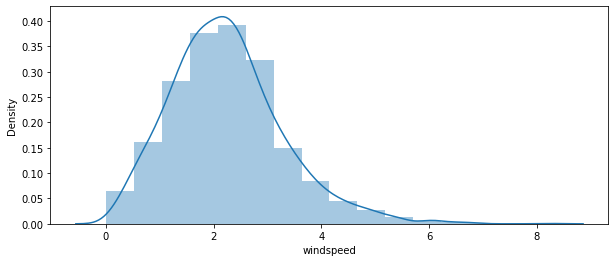

In [42]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.
rcParams['figure.figsize'] = 10, 4
sns.distplot(data[var], hist=True, bins=16)
plt.plot()

6. 위 정보로 부터 파악한 내용 정리

- 일반적으로 0~4 사이에 값이 존재

7. 추가 분석사항 도출

- 풍속이 6 이상으로 강한 날은 태풍과 같은 현상이 있지 않았을까? -> 강우 여부와 연계하여 확인

### var5 : humidity

In [43]:
var = 'humidity'

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

- 시간대 및 일자에 따른 습도(%)

2. 변수가 수치형인지 범주형인지


In [44]:
#변수의 자료형을 확인해보세요.
data[var].dtype

dtype('int64')

- 수치형(정수)

3. 변수의 결측치 존재 여부 및 조치방안

In [45]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data[var].isna().sum()

0

- 결측치 없음

4. 변수의 기초 통계량 확인

In [46]:
#변수의 기초 통계량을 확인해보세요
data[var].describe()

count    5827.000000
mean       68.608718
std        17.277266
min        19.000000
25%        56.000000
50%        70.000000
75%        82.000000
max       100.000000
Name: humidity, dtype: float64

5. 변수의 분포 확인

[]

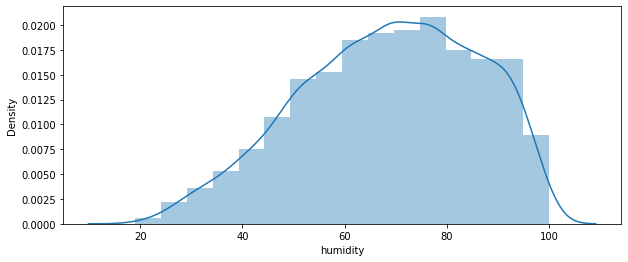

In [47]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.
sns.distplot(data[var], hist=True, bins=16)
plt.plot()

6. 위 정보로 부터 파악한 내용 정리

- 60 ~ 80 사이에 주로 분포

7. 추가 분석사항 도출

- 습도와 강수여부에 따른 상관관계
    - 습도가 높은 날은 많은데 강수는 습도가 높은 날에 비해 수가 많지 않음

### var6 : visibility

In [57]:
var = 'visibility'

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

- 시간대 및 일자에 대한 가시성

2. 변수가 수치형인지 범주형인지


In [52]:
#변수의 자료형을 확인해보세요.
data[var].dtype

dtype('int64')

- 수치형(정수)

3. 변수의 결측치 존재 여부 및 조치방안

In [58]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data[var].isna().sum()

0

- 결측치 없음

4. 변수의 기초 통계량 확인

In [54]:
#변수의 기초 통계량을 확인해보세요
data[var].describe()

count    5827.000000
mean     1758.438648
std       490.969394
min        60.000000
25%      1935.500000
50%      2000.000000
75%      2000.000000
max      2000.000000
Name: visibility, dtype: float64

5. 변수의 분포 확인

[]

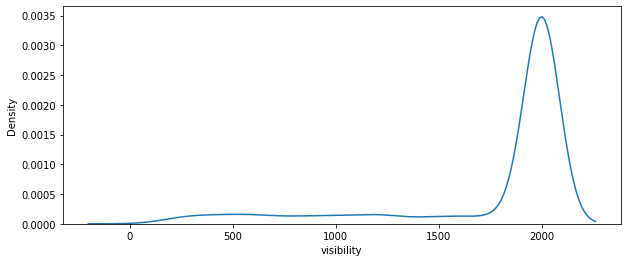

In [262]:
sns.kdeplot(data['visibility'])
plt.plot()

[]

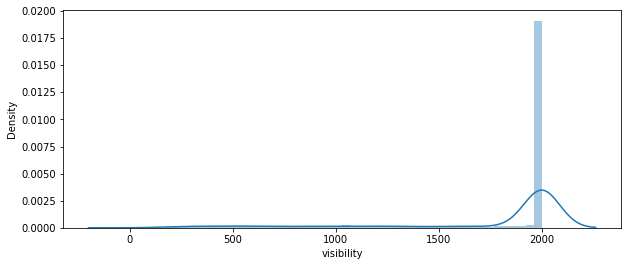

In [263]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.
sns.distplot(data['visibility'])
plt.plot()

6. 위 정보로 부터 파악한 내용 정리

- 대부분의 값이 2000 부근에 분포

7. 추가 분석사항 도출

### var7 : ozone

In [60]:
var = 'ozone'

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

- 시간대 및 일자에 따른 오존 농도

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요.
data[var].dtype

dtype('float64')

- 수치형(유리수)

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data[var].isna().sum()

128

- 128개의 결측치 존재 -> 전체 데이터에 비해 결측치가 적으므로 행 삭제 또는 평균치로 대체

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요
data[var].describe()

count    5699.000000
mean        0.031811
std         0.018277
min         0.001000
25%         0.019000
50%         0.031000
75%         0.041000
max         0.137000
Name: ozone, dtype: float64

5. 변수의 분포 확인

[]

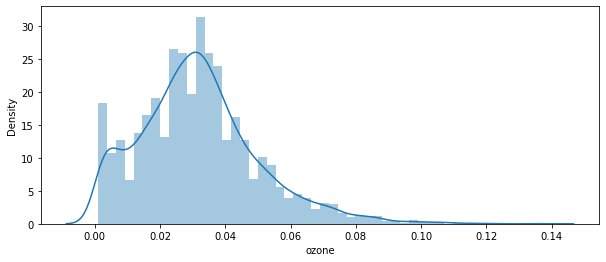

In [65]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.
sns.distplot(data[var])
plt.plot()

6. 위 정보로 부터 파악한 내용 정리

- 중위값과 평균값이 유사하므로 결측치를 평균값으로 대체해도 되지 않을까?

7. 추가 분석사항 도출

### var8 : PM10

In [66]:
var = 'PM10'

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

- 시간대 및 일자에 따른 미세먼지 수치

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요.
data[var].dtype

dtype('float64')

- 수치형(유리수)

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data[var].isna().sum()

102

- 102개의 결측치 존재 -> 전체 데이터에 비해 결측치가 적으므로 행 삭제 또는 평균치로 대체

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요
data[var].describe()

count    5725.000000
mean       31.970655
std        42.987292
min         3.000000
25%        16.000000
50%        25.000000
75%        37.000000
max       827.000000
Name: PM10, dtype: float64

- 평균 ~ 3사분위수와 최대값 사이 차이가 큼

5. 변수의 분포 확인

[]

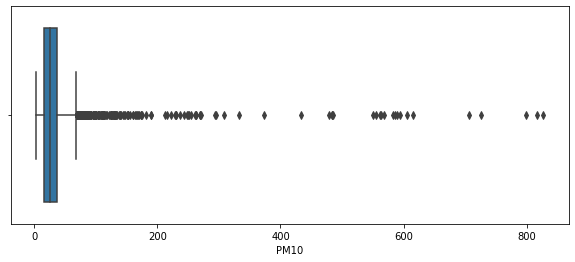

In [72]:
sns.boxplot(data[var])
plt.plot()

[]

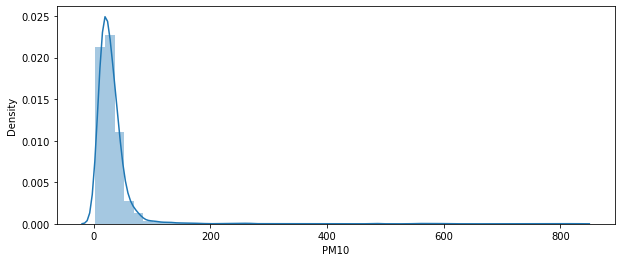

In [71]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.
sns.distplot(data[var])
plt.plot()

대부분의 데이터가 100 이하에 존재하나 일부 값이 큰 부분 존재

6. 위 정보로 부터 파악한 내용 정리

7. 추가 분석사항 도출

### var9 : PM2.5

In [73]:
var = 'PM2.5'

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

- 시간대 및 일자에 따른 초미세먼지 수치

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요.
data[var].dtype

dtype('float64')

- 수치형(유리수)

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data[var].isna().sum()

95

- 95개의 결측치 존재 -> 전체 데이터에 비해 결측치가 적으므로 행 삭제 또는 평균치로 대체

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요
data[var].describe()

count    5732.000000
mean       15.666609
std        13.850990
min         1.000000
25%         7.000000
50%        13.000000
75%        20.000000
max       125.000000
Name: PM2.5, dtype: float64

- 평균 ~ 3사분위수와 최대값 사이 차이가 큼

5. 변수의 분포 확인

[]

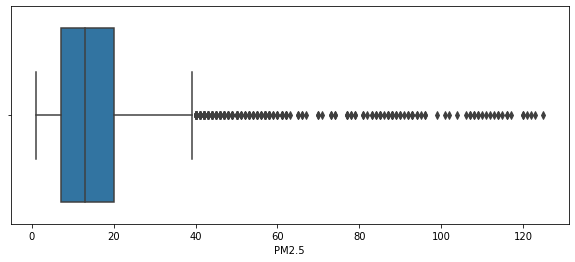

In [77]:
sns.boxplot(data[var])
plt.plot()

[]

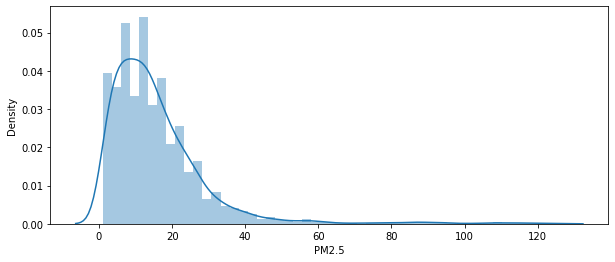

In [78]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.
sns.distplot(data[var])
plt.plot()

대부분의 데이터가 40 이하에 존재하나 일부 값이 큰 데이터 존재

6. 위 정보로 부터 파악한 내용 정리

7. 추가 분석사항 도출

### Count (Target)

In [81]:
var = 'count'

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

- 일자 및 시간대에 따른 따릉이 대여수

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요.
data[var].dtype

dtype('int64')

- 수치형(정수)

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data[var].isna().sum()

0

- 결측치 없음

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요
data[var].describe()

count    5827.000000
mean      215.117899
std       185.972900
min         1.000000
25%        53.000000
50%       186.000000
75%       315.000000
max      1746.000000
Name: count, dtype: float64

5. 변수의 분포 확인

[]

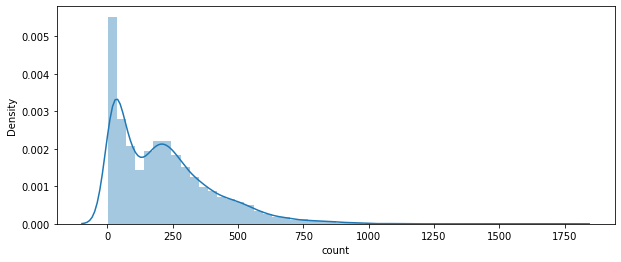

In [85]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.
sns.distplot(data[var])
plt.plot()

6. 위 정보로 부터 파악한 내용 정리

- 1사분위수가 53으로, 0~50대 정도에 많은 분포 보임

7. 추가 분석사항 도출

### 4.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

In [239]:
# 결측치 처리
tmp = data.copy()
tmp.dropna(axis=0, inplace=True)

In [240]:
# 주말/평일 열 추가
tmp['day'] = pd.to_datetime(tmp['date']).dt.weekday
tmp.loc[:, 'weekend'] = 0
tmp.loc[tmp['day']>4, 'weekend'] = 1

In [200]:
# 1시간 전 강수 여부 열 추가
tmp['rain_1h'] = tmp['precipitation'].shift()

In [234]:
target = 'count'

#### (1) 범주형 var --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 범주형 var에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.</font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : t-test, anova
        3. 관계 평가 (가설 검정)

1. 강수 여부와 따릉이 대여량간 이변량 분석

In [ ]:
feature = 'precipitation'

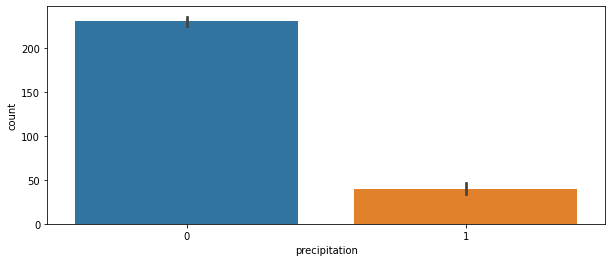

In [95]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.barplot(x=feature, y=target, data=tmp)
plt.show()

In [97]:
rainy = tmp.loc[tmp[feature]==1, target]
sunny = tmp.loc[tmp[feature]==0, target]

spst.ttest_ind(rainy, sunny)

Ttest_indResult(statistic=-20.998879971563788, pvalue=2.428442706503082e-94)

In [201]:
feature = 'rain_1h'

In [202]:
tmp2 = tmp.dropna(axis=0)

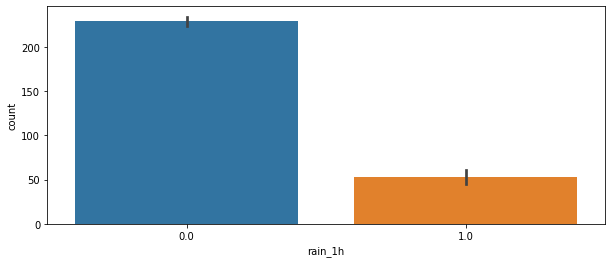

In [203]:
sns.barplot(x=feature, y=target, data=tmp)
plt.show()

In [204]:
rainy = tmp2.loc[tmp2[feature]==1, target]
sunny = tmp2.loc[tmp2[feature]==0, target]

spst.ttest_ind(rainy, sunny)

Ttest_indResult(statistic=-19.30668673059437, pvalue=1.731263608115079e-80)

2. 주말 여부와 따릉이 대여량간 이변량 분석

In [103]:
feature = 'weekend'

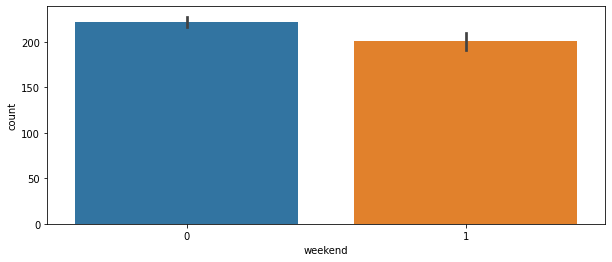

In [104]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.barplot(x=feature, y=target, data=tmp)
plt.show()

In [105]:
weekend = tmp.loc[tmp[feature]==1, target]
weekday = tmp.loc[tmp[feature]==0, target]

spst.ttest_ind(weekday, weekend)

Ttest_indResult(statistic=3.963667226751626, pvalue=7.471471115214049e-05)

In [259]:
data1 = data.copy()
data1.dropna(axis=0, inplace=True)
data1.drop(['hour', 'PM10', 'PM2.5', 'ozone', 'temperature', 'precipitation', 'visibility', 'windspeed', 'humidity'], axis=1, inplace=True)
data1['month']  = pd.to_datetime(data1['date']).dt.month

In [260]:
data1['month'] = data1['month'].astype(int)

In [261]:
# 계절별 따릉이 대여 비교
spring = data1.loc[data1['month'].between(4,5), target]
summer = data1.loc[data1['month'].between(6,8), target]
fall = data1.loc[data1['month'].between(9,11), target]

spst.f_oneway(spring, summer, fall)

F_onewayResult(statistic=8.256718538661938, pvalue=0.0002626437609843283)

#### (2) 숫자형 var --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 숫자형 var에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  </font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : 상관분석
        3. 관계 평가 (가설 검정)

2. 시간대별 데이터와 따릉이 대여량간 분석

In [153]:
feature = 'hour'

In [154]:
tmp2 = tmp.groupby(by=feature, as_index=False)[target].mean()

<AxesSubplot:xlabel='hour', ylabel='count'>

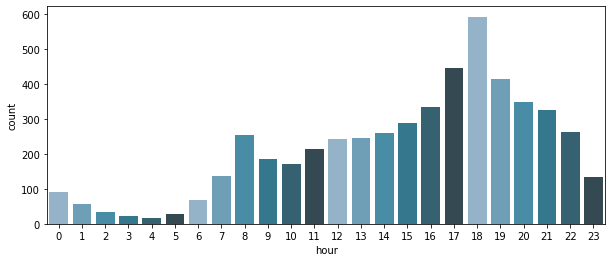

In [155]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
sequential_colors = sns.color_palette('PuBuGn_d')
sns.barplot(x=feature, y=target, data=tmp2, palette=sequential_colors)
plt.show()

In [156]:
spst.pearsonr(tmp2[feature], tmp2[target])

PearsonRResult(statistic=0.7481527444640866, pvalue=2.626578578424436e-05)

3. 온도 데이터와 따릉이 대여량간 분석

In [157]:
feature = 'temperature'

In [158]:
tmp2 = tmp.groupby(by=feature, as_index=False)[target].mean()

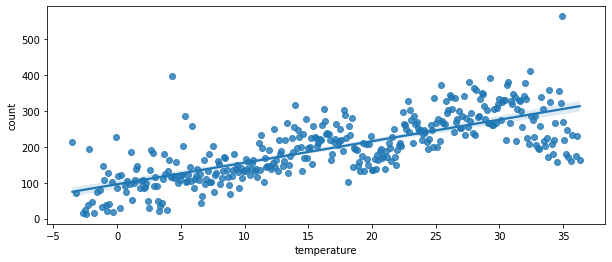

In [159]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.regplot(x=feature, y=target, data=tmp2)
plt.show()

In [160]:
spst.pearsonr(tmp2[feature], tmp2[target])

PearsonRResult(statistic=0.7523036081841851, pvalue=9.033771214996122e-70)

4. 풍속 데이터와 따릉이 대여량간 분석

In [161]:
feature = 'windspeed'

In [162]:
tmp2 = tmp.groupby(by=feature, as_index=False)[target].mean()

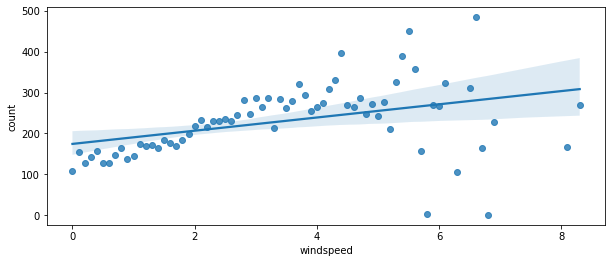

In [163]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.regplot(x=feature, y=target, data=tmp2)
plt.show()

In [164]:
spst.pearsonr(tmp2[feature], tmp2[target])

PearsonRResult(statistic=0.3954525956100808, pvalue=0.0007033680978961664)

5. 습도 데이터와 따릉이 대여량간 분석

In [165]:
feature = 'humidity'

In [166]:
tmp2 = tmp.groupby(by=feature, as_index=False)[target].mean()

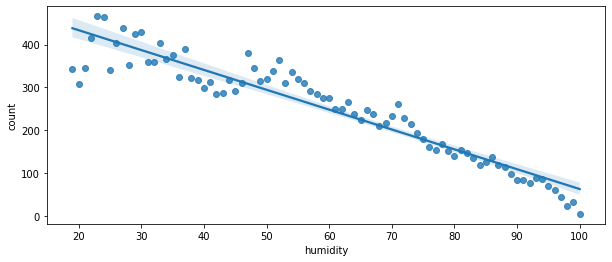

In [167]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.regplot(x=feature, y=target, data=tmp2)
plt.show()

In [168]:
spst.pearsonr(tmp2[feature], tmp2[target])

PearsonRResult(statistic=-0.9483308943564882, pvalue=1.2224570042851146e-41)

6. 시정 데이터와 따릉이 대여량간 분석

In [192]:
feature = 'visibility'

In [193]:
tmp2 = tmp.groupby(by=feature, as_index=False)[target].mean()

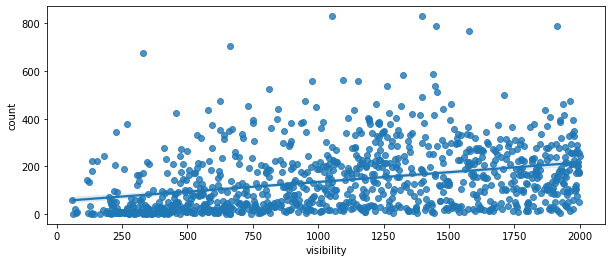

In [194]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.regplot(x=feature, y=target, data=tmp2)
plt.show()

In [195]:
spst.pearsonr(tmp2[feature], tmp2[target])

PearsonRResult(statistic=0.32980974055358014, pvalue=3.949041428387345e-27)

7. 오존 데이터와 따릉이 대여량간 분석

In [172]:
feature = 'ozone'

In [173]:
tmp2 = tmp.groupby(by=feature, as_index=False)[target].mean()

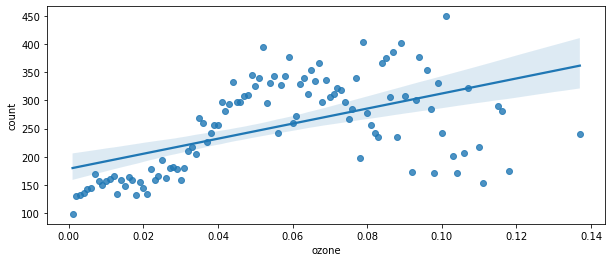

In [174]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.regplot(x=feature, y=target, data=tmp2)
plt.show()

In [175]:
spst.pearsonr(tmp2[feature], tmp2[target])

PearsonRResult(statistic=0.5400184537114647, pvalue=1.3610502915973346e-09)

8. 미세먼지 농도 데이터와 따릉이 대여량간 분석

In [184]:
feature = 'PM10'

In [185]:
tmp2 = tmp.groupby(by=feature, as_index=False)[target].mean()

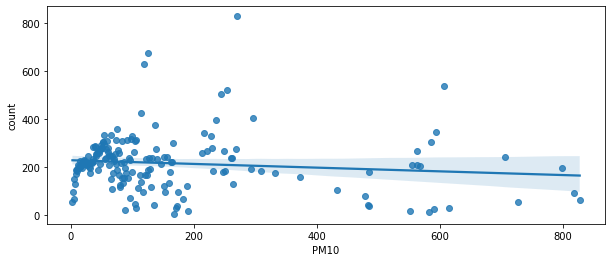

In [186]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.regplot(x=feature, y=target, data=tmp2)
plt.show()

In [187]:
spst.pearsonr(tmp2[feature], tmp2[target])

PearsonRResult(statistic=-0.1212987401462122, pvalue=0.10479247090327619)

9. 초미세먼지 농도 데이터와 따릉이 대여량간 분석

In [188]:
feature = 'PM2.5'

In [189]:
tmp2 = tmp.groupby(by=feature, as_index=False)[target].mean()

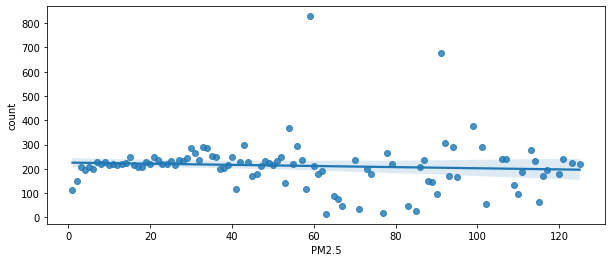

In [190]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.regplot(x=feature, y=target, data=tmp2)
plt.show()

In [191]:
spst.pearsonr(tmp2[feature], tmp2[target])

PearsonRResult(statistic=-0.0797670226035009, pvalue=0.4254802437406751)

10. 추가 분석

In [134]:
# 4월 28일 / 9월 2일에 따릉이 대여 수가 갑자기 많아졌는데 이유가 있을까?
data.loc[data['count']>1000]

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
664,2021-04-28,17,53.0,15.0,0.037,17.1,0,3.0,42,2000,1126
665,2021-04-28,18,49.0,15.0,0.033,17.2,0,3.0,40,2000,1600
3709,2021-09-02,17,15.0,7.0,0.046,25.8,0,1.5,63,2000,1090
3710,2021-09-02,18,20.0,8.0,0.043,25.4,0,2.1,65,2000,1746
3711,2021-09-02,19,17.0,9.0,0.039,24.9,0,1.1,66,2000,1086
3734,2021-09-03,18,6.0,6.0,0.045,28.0,0,2.3,44,2000,1026


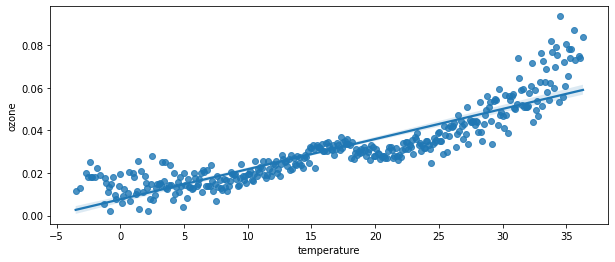

In [215]:
# 오존 농도와 온도 관계 분석
tmp2 = tmp.groupby(by='temperature', as_index=False)['ozone'].mean()
sns.regplot(x='temperature', y='ozone', data=tmp2)
plt.show()

In [216]:
spst.pearsonr(tmp2['temperature'], tmp2['ozone'])

PearsonRResult(statistic=0.890579304332981, pvalue=5.0128879821969e-130)

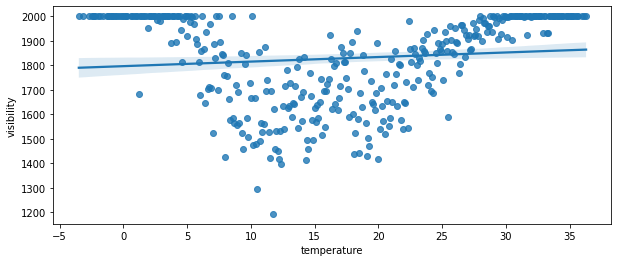

In [210]:
# 가시성과 온도 관계 분석
tmp2 = tmp.groupby(by='temperature', as_index=False)['visibility'].mean()
sns.regplot(x='temperature', y='visibility', data=tmp2)
plt.show()

In [211]:
spst.pearsonr(tmp2['temperature'], tmp2['visibility'])

PearsonRResult(statistic=0.111891082290004, pvalue=0.03006442313274583)

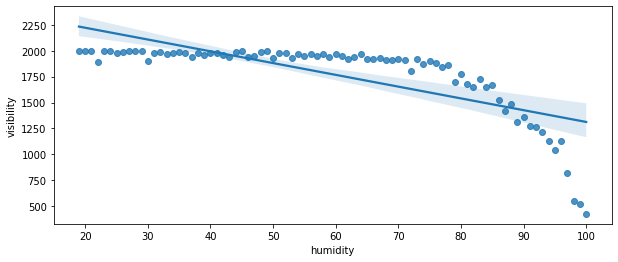

In [213]:
# 가시성과 온도 관계 분석
tmp2 = tmp.groupby(by='humidity', as_index=False)['visibility'].mean()
sns.regplot(x='humidity', y='visibility', data=tmp2)
plt.show()

In [214]:
spst.pearsonr(tmp2['visibility'], tmp2['humidity'])

PearsonRResult(statistic=-0.7449089913961431, pvalue=1.0268336711469344e-15)

### 5. 가설 검정

#### <font color='green'>1. 강한 관계의 변수 (대립가설 채택)</font>

- 강우 여부 -> 따릉이 대여 수
- 시간대 -> 따릉이 대여 수
- 온도 -> 따릉이 대여 수 (온도 -> 오존)
- 습도 -> 따릉이 대여 수 (습도 -> 가시성)

#### <font color='green'>2. 약한 관계의 변수</font>


- 주말/평일 여부 -> 따릉이 대여 수
- 풍속 -> 따릉이 대여 수

#### <font color='green'>3. 관계 없는 변수 (귀무가설 채택)</font>


- 미세먼지 농도 -> 따릉이 대여 수
- 초미세먼지 농도 -> 따릉이 대여 수

### 6. Insight 도출

- 17 ~ 19시 평일의 비가 오지 않는 날
- 온도 30도 이하, 풍속 4.5 m/s 이하면서 습도가 낮은 날